# Feature selection

## Filter methods

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
clf = KNeighborsClassifier()
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [6]:
y_train_hat = clf.predict(X_train_scaled)
print("train accuracy: ", accuracy_score(y_train, y_train_hat))

y_test_hat = clf.predict(X_test_scaled)
print("test accuracy: ", accuracy_score(y_test, y_test_hat))

train accuracy:  0.9835680751173709
test accuracy:  0.958041958041958


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

In [8]:
select = SelectKBest(f_classif, k=20)
select.fit(X_train_scaled, y_train)
print(select.scores_)

[5.18254933e+02 9.94345782e+01 5.51613830e+02 4.66309858e+02
 5.64493485e+01 2.11226398e+02 3.95240624e+02 6.32308919e+02
 4.00434884e+01 6.61131433e-01 2.54848311e+02 2.36026842e-01
 2.31676665e+02 2.26297869e+02 1.63972958e+00 3.68179931e+01
 3.68685859e+01 1.01235606e+02 3.45690129e-01 3.42748984e+00
 6.73469382e+02 1.23667230e+02 6.92297454e+02 5.05491657e+02
 8.10125979e+01 2.13082124e+02 3.04783756e+02 7.07368105e+02
 6.72152595e+01 4.02430003e+01]


In [13]:
len(cancer.feature_names)

30

In [14]:
# TODO 
X_train_selected=select.transform(X_train_scaled)
X_test_selected=select.transform(X_test_scaled)

In [15]:
clf = KNeighborsClassifier()
clf.fit(X_train_selected,y_train)

KNeighborsClassifier()

In [17]:
y_train_hat = clf.predict(X_train_selected)
y_test_hat = clf.predict(X_test_selected)

In [18]:
print("train accuracy: ", accuracy_score(y_train, y_train_hat))
print("test accuracy: ", accuracy_score(y_test, y_test_hat))

train accuracy:  0.9812206572769953
test accuracy:  0.965034965034965


## Wrapper methods

In [20]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [21]:
estimator = SVC(kernel="linear")
select = RFE(estimator, n_features_to_select=10, step = 1)
select.fit(X_train_scaled, y_train)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)

In [22]:
select.get_support() #앞에 4개 안쓰고, 5,6번째 안쓰고....False => 안씀.

array([False, False, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False])

In [145]:
X_train_selected = select.transform(X_train_scaled) #위에 결과 기반으로 feature select
X_test_selected = select.transform(X_test_scaled)
select.get_support()

array([False, False, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False])

# Feature extraction

## PCA

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
pca= PCA(n_components=2)
pca.fit(X_train_scaled) #train data로 fit해야함.!! //// scaling 영향받기때문에 먼저 진행 후 fit.

PCA(n_components=2)

In [30]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [31]:
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_train_pca.shape))) # 30개 에서 2개 만 사용.

Original shape: (426, 30)
Reduced shape: (426, 2)


In [32]:
pca.components_ #eigenvector

array([[ 0.21606219,  0.10256791,  0.22510819,  0.21883451,  0.14804204,
         0.23928857,  0.25918989,  0.26246319,  0.15070222,  0.06038287,
         0.20440268,  0.03117209,  0.20946517,  0.19911163,  0.02674616,
         0.16680985,  0.15709119,  0.18483612,  0.05078459,  0.10095405,
         0.22574568,  0.10634565,  0.23560393,  0.2235323 ,  0.13033081,
         0.20797412,  0.23176851,  0.25148098,  0.12500401,  0.12505041],
       [-0.23826294, -0.05282173, -0.22045406, -0.23448566,  0.17369883,
         0.15545513,  0.0588006 , -0.03833648,  0.17583295,  0.3635054 ,
        -0.1148424 ,  0.09281816, -0.09424561, -0.15653968,  0.19724414,
         0.23628718,  0.20051477,  0.13534311,  0.15495272,  0.28774197,
        -0.22335781, -0.03836196, -0.20240362, -0.22167808,  0.16714483,
         0.15270009,  0.0983546 , -0.00333393,  0.11991076,  0.28721882]])

In [34]:
pca.components_.shape

(2, 30)

Text(0, 0.5, 'Principal components')

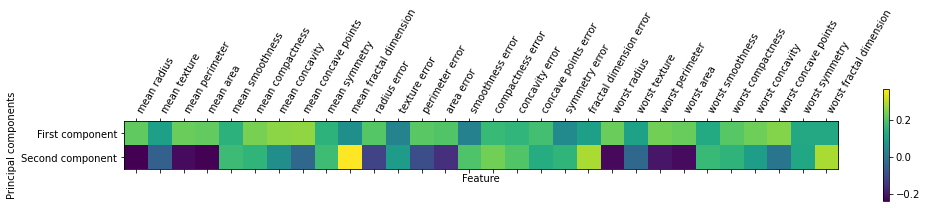

In [33]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
#노란색 영역이 first principal component로 구성된다.
# 음수여도 반대방향으로 큰것.


##### instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve

In [35]:
pca = PCA(n_components= 0.95) # 1보다 작은 0.95 넣으면 어떻게 될까? -> 추출된 feature 몇개까지 써야되나 알아서 선택?
pca.fit(X_train_scaled)

PCA(n_components=0.95)

In [37]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [38]:
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_train_pca.shape))) #10개 변수는 전체 variance의 95프로 이상을 설명할 수 있음 

Original shape: (426, 30)
Reduced shape: (426, 10)


In [39]:
pca.explained_variance_ #내림차순 eigenvalue

array([13.15181678,  5.87319778,  2.89219063,  1.94941498,  1.55787093,
        1.23844232,  0.67722871,  0.51074165,  0.41218357,  0.35996204])

In [84]:
pca.explained_variance_ratio_ #위의 내용의 상대적인 비율

array([0.4373648 , 0.1953137 , 0.09618005, 0.06482796, 0.05180713,
       0.04118451, 0.0225213 , 0.01698476, 0.0137072 , 0.01197057])

In [85]:
sum(pca.explained_variance_ratio_)

0.9518619710973647

#### or, you can compute PCA without reducing dimensionality, then compute the minimum number of dimensions required to preserve a certain ratio of the training set’s variance

In [48]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [49]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [50]:
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_train_pca.shape)))

Original shape: (426, 30)
Reduced shape: (426, 30)


In [51]:
pca.explained_variance_ratio_

array([4.37364799e-01, 1.95313698e-01, 9.61800483e-02, 6.48279631e-02,
       5.18071319e-02, 4.11845060e-02, 2.25212991e-02, 1.69847577e-02,
       1.37072000e-02, 1.19705686e-02, 1.01161412e-02, 9.01401130e-03,
       7.94309002e-03, 5.20908102e-03, 2.80841622e-03, 2.30759729e-03,
       1.96259278e-03, 1.78970331e-03, 1.61781771e-03, 1.04904330e-03,
       9.79526429e-04, 8.89177695e-04, 8.27361634e-04, 5.64751495e-04,
       4.91393162e-04, 2.65340955e-04, 2.26000521e-04, 4.81652901e-05,
       2.48751684e-05, 3.94239575e-06])

In [52]:
sum(pca.explained_variance_ratio_) #0.95!!!

1.0

In [53]:
sum(pca.explained_variance_ratio_[:10])

0.9518619710973647

In [54]:
np.cumsum(pca.explained_variance_ratio_)

array([0.4373648 , 0.6326785 , 0.72885854, 0.79368651, 0.84549364,
       0.88667815, 0.90919944, 0.9261842 , 0.9398914 , 0.95186197,
       0.96197811, 0.97099212, 0.97893521, 0.98414429, 0.98695271,
       0.98926031, 0.9912229 , 0.9930126 , 0.99463042, 0.99567947,
       0.99665899, 0.99754817, 0.99837553, 0.99894028, 0.99943168,
       0.99969702, 0.99992302, 0.99997118, 0.99999606, 1.        ])

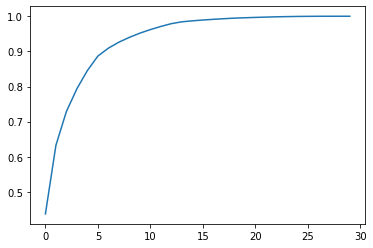

In [55]:
# explained variance vs number of PCs
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #np.cumsum = clumulative sum
# 마지막 값은 1이여야함.

In [ ]:
'''n_component = 0.95 로 하고 똑같이 해보기'''
#variance의 합 = 0.95

### Reconstruction

In [56]:
X_test_scaled

array([[-0.46809882, -0.14171322, -0.44468042, ..., -0.17331092,
         0.22117163,  0.23655985],
       [ 1.36445686,  0.49958757,  1.30643802, ...,  1.0294302 ,
        -0.53161875, -0.99405722],
       [ 0.37878549,  0.06653205,  0.40430925, ...,  0.6020997 ,
        -0.06661217, -0.17972015],
       ...,
       [-0.87313045, -0.5605702 , -0.86361419, ..., -0.59582424,
         0.19515727, -0.25830652],
       [ 1.6108747 ,  0.69836715,  1.57007383, ...,  1.96023373,
        -0.17879907, -0.40978461],
       [-1.09405679, -1.65149148, -1.07658249, ..., -0.71003802,
         0.09597755, -0.34885169]])

In [57]:
pca = PCA(n_components = 3) #3차원으로 줄어듬
pca.fit(X_train_scaled)

PCA(n_components=3)

In [58]:
X_test_pca = pca.transform(X_test_scaled)
X_test_rec = pca.inverse_transform(X_test_pca) #원래 축으로 돌려줌. -> 정보 손실!

In [59]:
X_test_rec #정보손실 확인 가능

array([[-0.30953369, -0.14359317, -0.3027183 , ..., -0.04961651,
         0.19335452,  0.27159613],
       [ 1.63067371,  0.52048518,  1.57722283, ...,  0.6669837 ,
        -0.2359176 , -0.95794764],
       [ 0.58493966,  0.13933672,  0.58184093, ...,  0.63821879,
         0.45740073,  0.21039123],
       ...,
       [-0.70709835, -0.36153882, -0.72456386, ..., -0.55067455,
        -0.04707553, -0.02796018],
       [ 2.05622116,  0.70119401,  2.02964389, ...,  1.37134199,
         0.28996417, -0.41966616],
       [-0.95760507, -0.46806116, -0.97486173, ..., -0.70514945,
        -0.04111538,  0.03122585]])

In [60]:
pca = PCA(n_components =20)
pca.fit(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_test_rec = pca.inverse_transform(X_test_pca) #원래 축으로 돌려줌. -> 정보 손실!
X_test_rec #정보손실이 3일때보단 적게 되는것을 확인 가능!

array([[-0.44378231, -0.15275104, -0.43081534, ..., -0.13832672,
         0.20688733,  0.20211992],
       [ 1.37043706,  0.41642372,  1.32311259, ...,  0.84055274,
        -0.53004099, -0.95268869],
       [ 0.41073606,  0.08723772,  0.42213744, ...,  0.68112319,
        -0.06537346, -0.28386037],
       ...,
       [-0.82810673, -0.52270208, -0.84343132, ..., -0.53638238,
         0.19913069, -0.32066346],
       [ 1.62469752,  0.61060664,  1.55662401, ...,  1.79033232,
        -0.21833979, -0.30874022],
       [-1.06795686, -1.69903806, -1.0653877 , ..., -0.74460853,
         0.07523947, -0.27661671]])

### PCA in supervised learning 

In [61]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#전처리단계

In [99]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [100]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [102]:
y_train_hat = clf.predict(X_train_scaled)
print("train accuracy: ", accuracy_score(y_train, y_train_hat))

y_test_hat = clf.predict(X_test_scaled)
print("test accuracy: ", accuracy_score(y_test, y_test_hat))

train accuracy:  0.9835680751173709
test accuracy:  0.958041958041958


In [69]:
# TODO = PCA만 끼워서 해보자
pca = PCA(n_components= 2)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_pca,y_train)

y_train_hat = clf.predict(X_train_pca)
y_test_hat = clf.predict(X_test_pca)

print("train accuracy: ", accuracy_score(y_train, y_train_hat))
print("test accuracy: ", accuracy_score(y_test, y_test_hat))
#차원을 줄여 확인해보니 test acc 증가한 모습

train accuracy:  0.9577464788732394
test accuracy:  0.965034965034965


In [106]:
print("train accuracy: ", accuracy_score(y_train, y_train_hat))
print("test accuracy: ", accuracy_score(y_test, y_test_hat))

train accuracy:  0.9577464788732394
test accuracy:  0.965034965034965


## t-SNE

In [72]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

digits = load_digits()
digits.data.shape
#차원은 64차원이다

(1797, 64)

In [73]:
# dim reduction with pca
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

In [74]:
# dim reduction with tsne
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method. not be used as preprocessing step of supervised learning
digits_tsne = tsne.fit_transform(digits.data)
#시간이 원래 좀 거림. neural network 에서 사용하는 gradient descent 방식 사용하기때문

In [75]:
digits_pca

array([[ -1.25946643,  21.27488346],
       [  7.95761106, -20.76869789],
       [  6.99192311,  -9.95598714],
       ...,
       [ 10.8012838 ,  -6.9602522 ],
       [ -4.8721003 ,  12.42395351],
       [ -0.34438937,   6.36554829]])

In [123]:
digits_tsne

array([[ 65.25366   ,  -0.32000518],
       [-21.453482  ,  -5.3581433 ],
       [ -8.7417555 ,  25.999811  ],
       ...,
       [ -2.0523312 ,  12.874825  ],
       [ 22.51551   ,   1.8641503 ],
       [  0.13101313,  15.256716  ]], dtype=float32)

Text(0, 0.5, 'Second principal component')

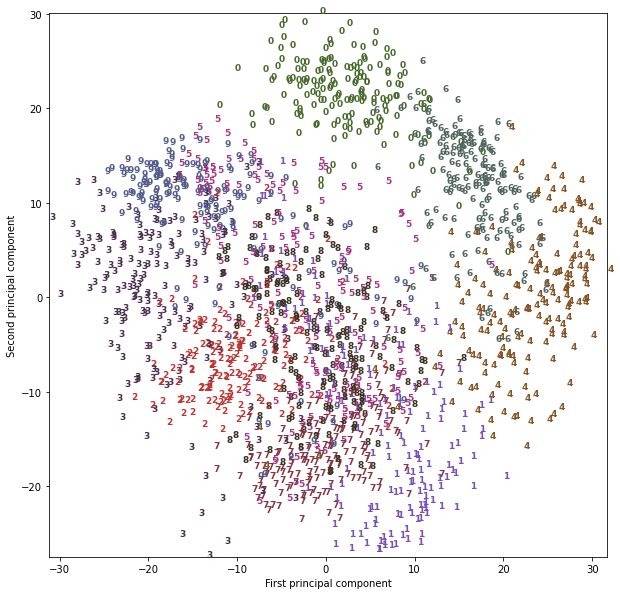

In [117]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#중복되는 경우 많음. 난잡하게 섞여있다.

Text(0, 0.5, 'Second principal component')

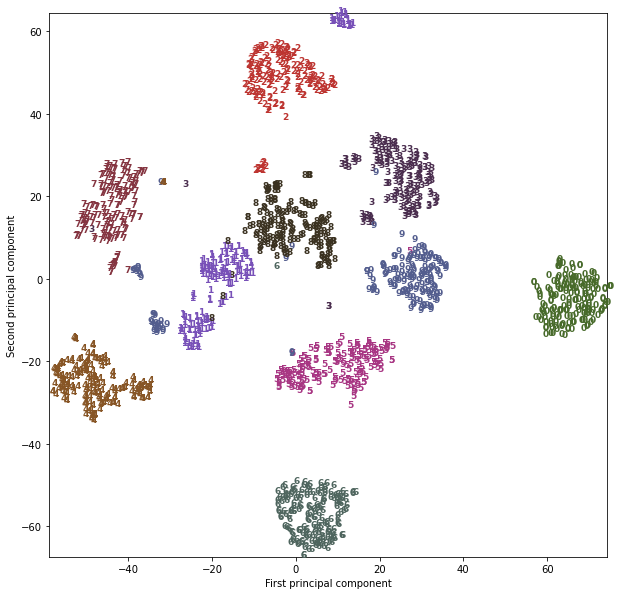

In [124]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#상대적으로 잘 뭉쳐져있다! -> 시각화하는데 잘 사용됨.

#### all the classes are quite clearly depareted. As shown, t-SNE can do more complex mapping